http://archive.ics.uci.edu/ml/datasets/Student+Performance#

### All needed imports

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 80

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC # SVM model with kernels
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

### Loading and Exploring Data

There are two files of students performance in two subjects: math and portugues (Portugal is the country the dataset is from). Out of curiosity I'll take maths lessons

In [4]:
student_math = pd.read_csv('student/student-mat.csv', sep = ';')
student_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
student_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
student_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [8]:
# check missing values in variables

student_math.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### After inspecting the dataset description I'm curious how *health* and *absences* values corelate. Perhaps, I could made one feature out of them. But before looking for correlation we should normalize these features, cause their ranges differ very much.

#### Since I have not found a descent Mean normalization function that would suit me, I am gonna build one myself, using formula: <br>  xi = (xi - mean)/(max-min).  Values *mean, max_min* where taken from *.describe()* method. 

<p>For the sake of God I'll make a copy for such playground</p>

### UPD: normalizing values didn't help. Seems that normaliying or not, nothing changes... I should look it up

In [57]:
copied = student_math.copy()

mean = 5.7
max_min = 75

def mean_normalization(x):
    return((x-mean)/max_min)

copied['absences'] = copied['absences'].apply(mean_normalization)

corr_matrix = copied.corr()

corr_matrix["absences"].sort_values(ascending=False)

absences      1.000000
age           0.175230
Walc          0.136291
Dalc          0.111908
Medu          0.100285
failures      0.063726
goout         0.044302
G3            0.034247
Fedu          0.024473
traveltime   -0.012944
health       -0.029937
G1           -0.031003
G2           -0.031777
famrel       -0.044354
freetime     -0.058078
studytime    -0.062700
Name: absences, dtype: float64

In [58]:
corr_matrix = student_math.corr()

corr_matrix["absences"].sort_values(ascending=False)

absences      1.000000
age           0.175230
Walc          0.136291
Dalc          0.111908
Medu          0.100285
failures      0.063726
goout         0.044302
G3            0.034247
Fedu          0.024473
traveltime   -0.012944
health       -0.029937
G1           -0.031003
G2           -0.031777
famrel       -0.044354
freetime     -0.058078
studytime    -0.062700
Name: absences, dtype: float64

### A little bit about correlation. 

<p>Since the dataset is not too large we can easily compute *standard correlation coefficient* (also called Pearson’s r) between every pair of attributes using the *corr()* method.
    
The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; when the coefficient is close to –1, it means that there is a strong negative correlation.Finally, coefficients close to 0 mean that there is no linear correlation. </p>

<p>The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “if x is close to 0, then y generally goes up”)</p>

#### Let’s look at how much each *numerical* attribute correlates with *G3* value:

In [59]:
corr_matrix["G3"].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

## Choosing features

### After short reconsideration with myself I though of the following features, that should impact studing and notes:

<ul>
    <li>Numerical: Medu, Fedu, studytime, famrel, failures, freetime, Dalc, Walc</li>
    <li>Categorical: sex, activities, higher, internet</li>
</ul>

<p>See dataset description for info about each feature </p>

#### Looking at the data we can see string-valued features. It’s not arbitrary text: there are a limited number of possible values, each of which represents a category. So this attribute is a categorical attribute. Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


>>> ordinal_encoder = OrdinalEncoder()
>>> housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) >>> housing_cat_encoded[:10]

### So, i will be trying to predict possible final grades *G3*

#### In Data Set Info it's said that attribute *G3* has a strong correlation with attributes *G2* and *G1* (G3 is the final year grade and  G1 and G2 correspond to the 1st and 2nd period grades). The values *G1 - G3* vary from 0 to 20.

Let's check for all possible correlations

In [24]:
print(student_math['G3'].value_counts(), '\n\n', student_math['G1'].value_counts(), 
      '\n\n', student_math['G2'].value_counts())

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64 

 10    51
8     41
11    39
7     37
12    35
13    33
9     31
14    30
15    24
6     24
16    22
17     8
18     8
5      7
19     3
4      1
3      1
Name: G1, dtype: int64 

 9     50
10    46
12    41
13    37
11    35
15    34
8     32
14    23
7     21
5     15
6     14
0     13
16    13
18    12
17     5
19     3
4      1
Name: G2, dtype: int64


#### Apparently, *G3* has correlation with *Medu* (mother's education) and *Fedu* (father's education)

#### Another way to check for correlation between attributes is to use the pandas *scatter_matrix()* function, which plots every numerical attribute against every other numerical attribute. Since there are 16 numerical attributes, we would get 16x16 = 256 plots, which would not fit on a page—so let’s just focus on a few promising attributes that seem most correlated with *G3*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96fd6c7690>,
      dtype=object)

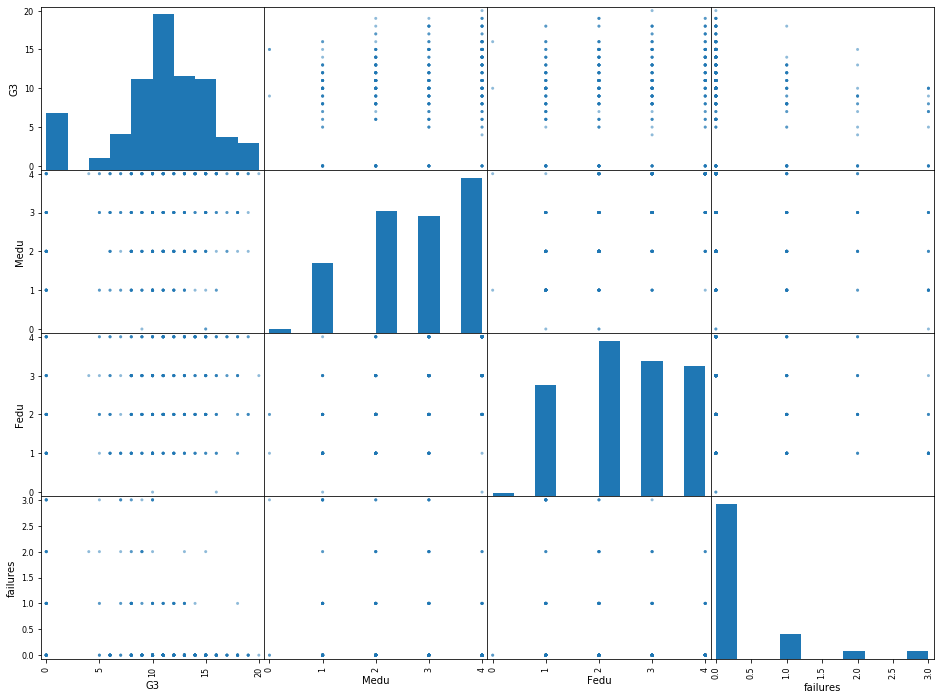

In [28]:
from pandas.plotting import scatter_matrix

# I don't take G2 and G1 into account, because they are an obvious choice
attributes = ["G3", "Medu", "Fedu", "failures"] 

scatter_matrix(student_math[attributes], figsize=(16, 12))

TypeError: unsupported operand type(s) for +: 'float' and 'str'

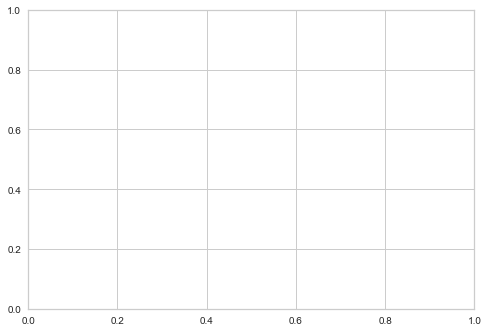

In [33]:
from yellowbrick.target import FeatureCorrelation

# Create a list of the feature names
features = np.array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'])

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [31]:
student_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [34]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Load the regression dataset
data = datasets.load_diabetes()

features = np.array(data['feature_names'])
features

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype='<U3')

In [35]:
data['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [36]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

#### Retrieving predicting *X* and  target *y* features

In [15]:
X = student_math.drop(['G3'], axis=1)
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,14,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,10,8
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,11,12


In [17]:
y = student_math['G3'].copy()
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64